# Customer Satisfaction Prediction Analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("customer_support_tickets.csv")

In [3]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.shape

(8469, 17)

In [14]:
df.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469.000000,8469,5650,2769,2769.000000
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:26:47.270265600,2023-06-01 11:17:21.509931520,2.991333
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,2118.000000,31.000000,2020-07-02 00:00:00,2023-06-01 05:24:28.750000128,2023-06-01 05:34:43,2.000000
50%,4235.000000,44.000000,2020-12-31 00:00:00,2023-06-01 11:26:25,2023-06-01 11:17:48,3.000000
75%,6352.000000,57.000000,2021-07-01 00:00:00,2023-06-01 17:37:06.249999872,2023-06-01 17:07:32,4.000000
max,8469.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000
std,2444.934048,15.296112,NaN,NaN,NaN,1.407016


In [4]:
# Convert date columns to datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

In [25]:
# Creating a new column for year and month from date of purchase coulmn.
df['YearMonth'] = df['Date of Purchase'].dt.to_period('M')

In [24]:
#Checking the duplicate rows in the data.
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   category      
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   category      
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   category      
 11  Resolution                    

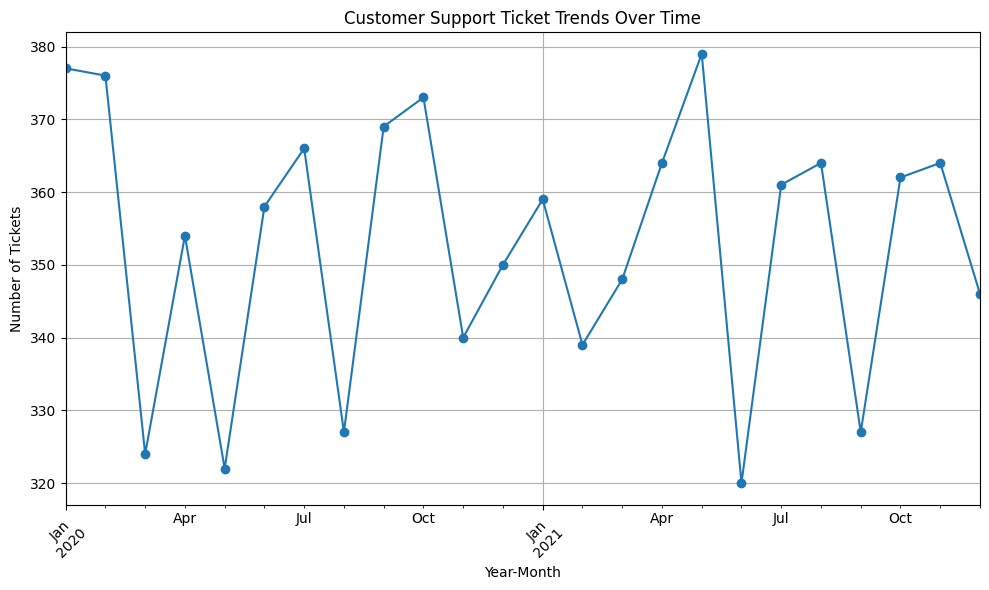

In [26]:
ticket_trends = df.groupby('YearMonth').size()

# Analyzing Seasonal Trends and Fluctuations in Customer Support Ticket.
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Identifying the common issues while purchasing ticket.
Common_issues = df['Ticket Subject'].value_counts().head(10)
Common_issues

Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64

In [9]:
# Identifying segmentation of tickets.
ticket_type_segmentation = df.groupby('Ticket Type').size()
ticket_type_segmentation

Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

In [10]:
#Number of satisfaction ratings given by customers.
satisfaction_segmentation = df.groupby('Customer Satisfaction Rating').size()
satisfaction_segmentation

Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64

In [11]:
cat_cols = ['Product Purchased', 'Ticket Type', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']
df[cat_cols] = df[cat_cols].astype('category')

In [12]:
# Encode Ticket Priority levels
df['Ticket Priority'] = df['Ticket Priority'].cat.codes + 1  # Convert Low=1, Medium=2, High=3, Urgent=4

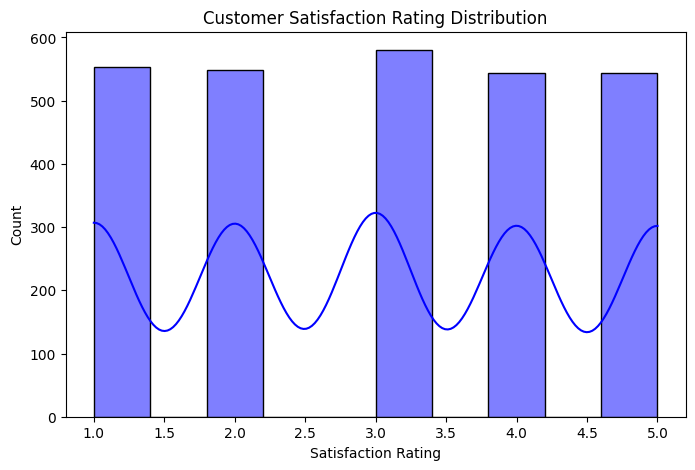

In [13]:
# Distribution of Customer Satisfaction
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Satisfaction Rating'], bins=10, kde=True, color='blue')
plt.title("Customer Satisfaction Rating Distribution")
plt.xlabel("Satisfaction Rating")
plt.ylabel("Count")
plt.show()

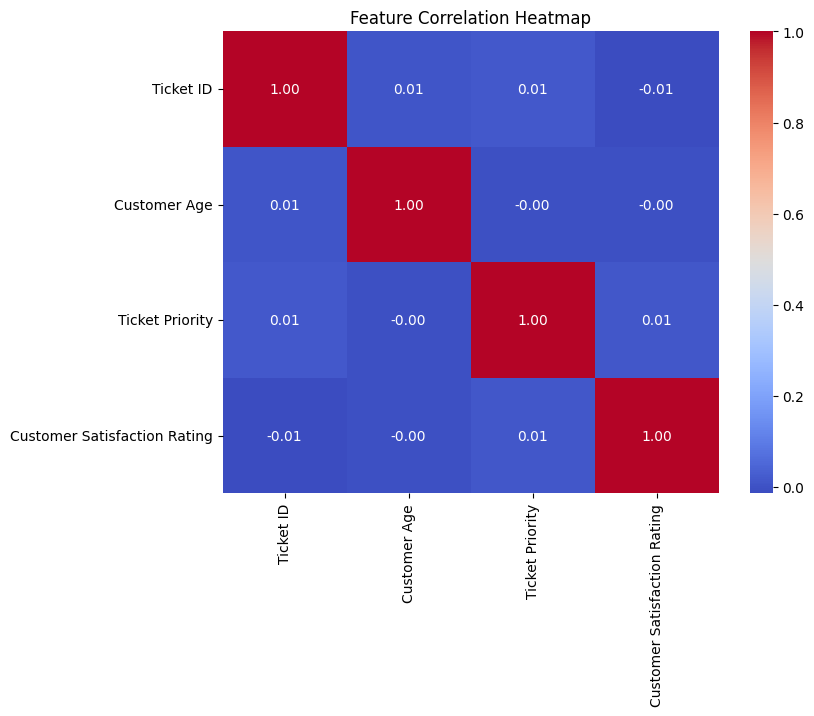

In [14]:
# Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

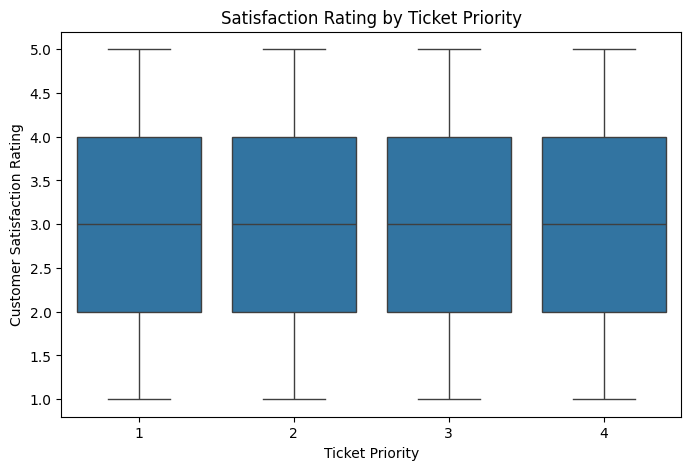

In [15]:
# Analyzing Satisfaction by Ticket Priority
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=df)
plt.title("Satisfaction Rating by Ticket Priority")
plt.show()

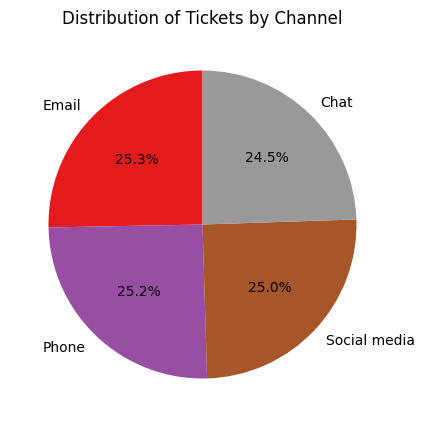

In [16]:
# Analyzing Satisfaction by Ticket Channel using Pie Chart
plt.figure(figsize=(8, 5))
df['Ticket Channel'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Set1', startangle=90)
plt.title("Distribution of Tickets by Channel")
plt.ylabel("")
plt.show()

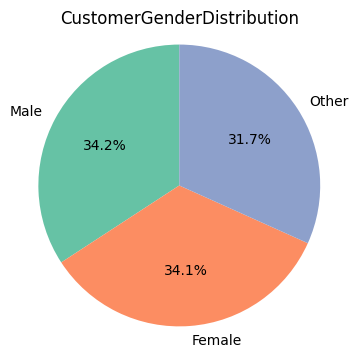

In [17]:
#Customer Gender Distribution
customer_gender_distribution=df['Customer Gender'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index,autopct='%1.1f%%',
colors=sns.color_palette('Set2'),startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

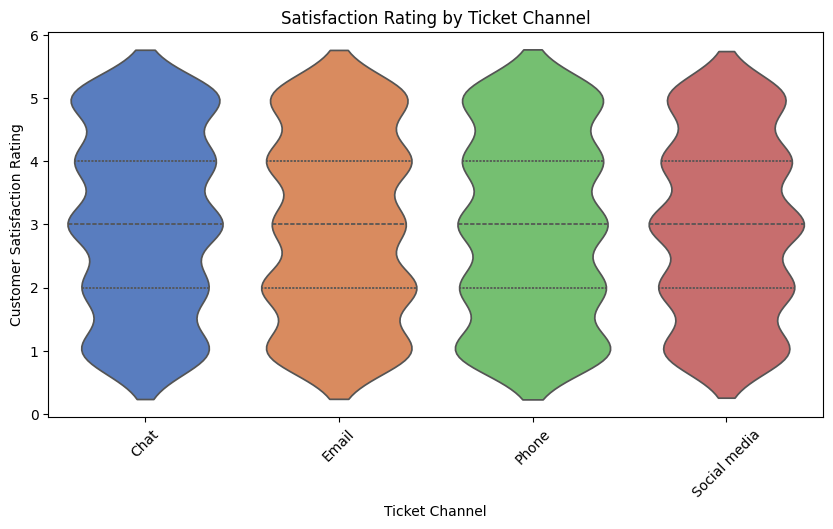

In [18]:
# Analyzing Satisfaction by Ticket Channel using Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='Ticket Channel', y='Customer Satisfaction Rating', hue='Ticket Channel', data=df, inner="quartile", palette="muted", legend=False)
plt.xticks(rotation=45)
plt.title("Satisfaction Rating by Ticket Channel")
plt.show()

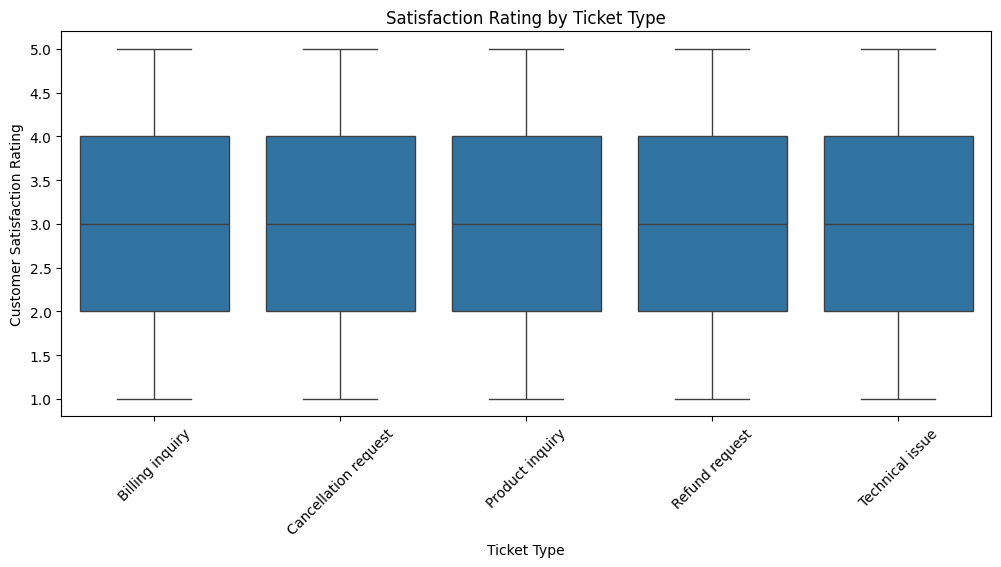

In [19]:
# Analyzing Satisfaction by Ticket Type
plt.figure(figsize=(12, 5))
sns.boxplot(x='Ticket Type', y='Customer Satisfaction Rating', data=df)
plt.xticks(rotation=45)
plt.title("Satisfaction Rating by Ticket Type")
plt.show()

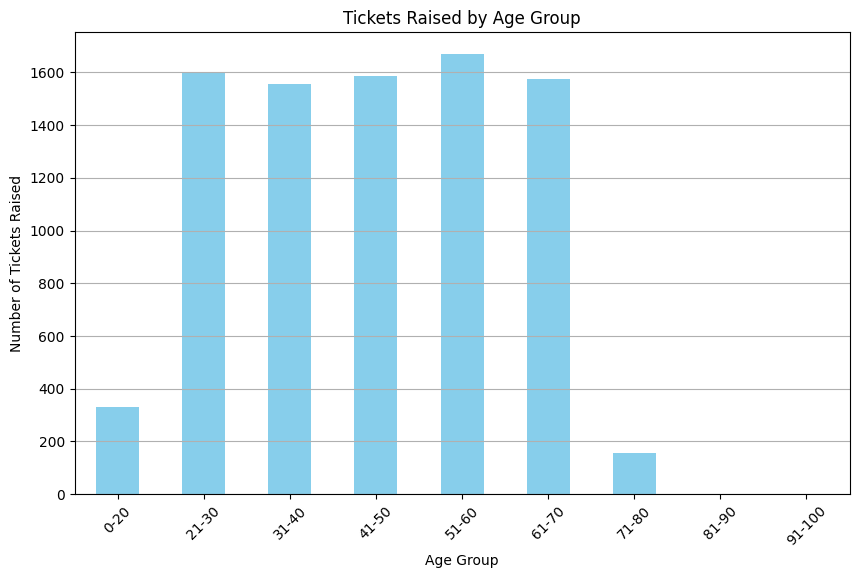

In [21]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate number of tickets raised by each age group
tickets_by_age_group = df.groupby('Age Group', observed=False).size()

# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [28]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
YearMonth                          0
Age Group                          0
dtype: int64

In [29]:
df.shape

(8469, 19)

In [48]:
# Removing the NaN for building machine learning models
df = df.dropna()

In [32]:
df.shape

(2769, 19)

In [45]:
# Building the Random Forest Classifier
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoders if needed later for inverse transformation

# Splitting features and target
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (Only apply scaling to numeric features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classifier Performance")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       104
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00       109
           5       0.99      1.00      1.00       106
           6       1.00      0.90      0.95        10

    accuracy                           1.00       554
   macro avg       1.00      0.99      0.99       554
weighted avg       1.00      1.00      1.00       554

Confusion Matrix:
 [[ 22   0   0   0   0   0   0]
 [  0  97   0   0   0   0   0]
 [  0   0 104   0   0   0   0]
 [  0   0   0 106   0   0   0]
 [  0   0   0   0 109   0   0]
 [  0   0   0   0   0 106   0]
 [  0   0   0   0   0   1   9]]


In [44]:
# Building the Logistic Regression Model
# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=500, C=1.0, solver='lbfgs')
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        22
           1       0.95      0.77      0.85        97
           2       0.93      0.91      0.92       104
           3       0.93      0.92      0.92       106
           4       0.93      0.91      0.92       109
           5       0.90      0.89      0.90       106
           6       0.42      0.80      0.55        10

    accuracy                           0.88       554
   macro avg       0.80      0.89      0.83       554
weighted avg       0.91      0.88      0.89       554

Confusion Matrix:
 [[22  0  0  0  0  0  0]
 [18 75  4  0  0  0  0]
 [ 0  4 95  5  0  0  0]
 [ 0  0  3 97  6  0  0]
 [ 0  0  0  2 99  8  0]
 [ 0  0  0  0  1 94 11]
 [ 0  0  0  0  0  2  8]]
